In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
import plotly

plotly.offline.init_notebook_mode(connected=True)

In [5]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [6]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-05-19 13:05:54,507 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [7]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 32
}
matplotlib.rc('font', **font)


In [16]:
biplot_phes = [
    'cholelithiasis/gall stones',
    'cholecystitis',
    'Water intake',
    'Creatinine (enzymatic) in urine',
    'Sodium in urine',
    'Eosinophill percentage',
    'high cholesterol',    
]


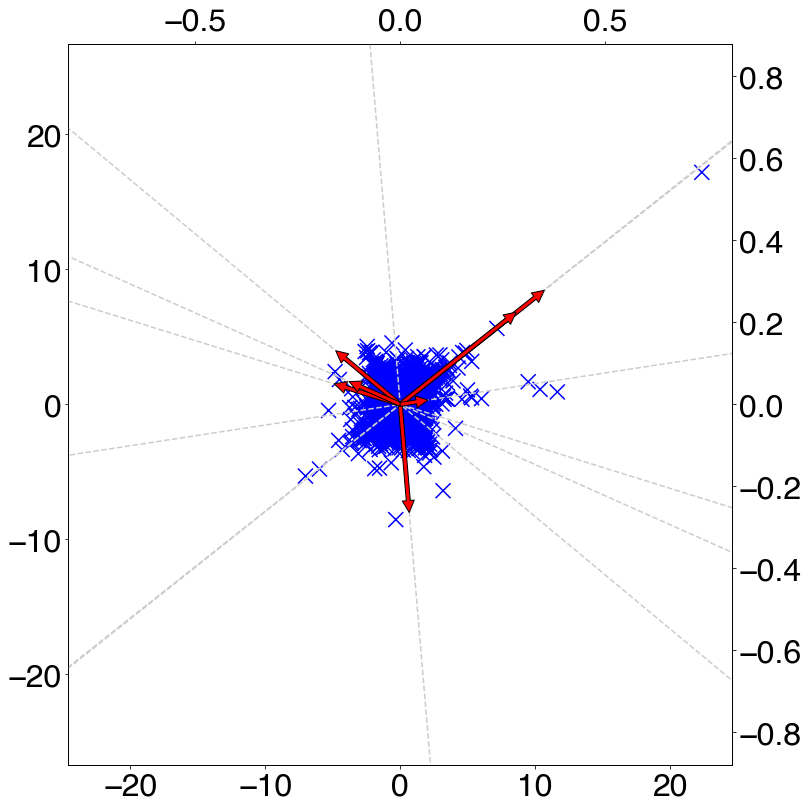

In [18]:
biplot_df = decomposition.plot_biplot(
    d_all, 
    pc_index1=72 - 1, pc_index2=64 - 1, 
    biplot_phes=biplot_phes, 
    arrow_max_scale=2.5,    
    figsize=(12,12), 
    save=os.path.join(out_dir, 'Biplot_Gallstones_PC72xPC64')
)

In [22]:
biplot_df['slope'] = biplot_df['y'] / biplot_df['x']

In [23]:
biplot_df.sort_values(by='slope')

,phe,x,y,slope
2,Water intake,0.022187,-0.263930,-11.895973
3,Creatinine (enzymatic) in urine,-0.157267,0.130837,-0.831942
5,Eosinophill percentage,-0.124483,0.055509,-0.445916
4,Sodium in urine,-0.161082,0.050141,-0.311274
6,high cholesterol,0.068105,0.010438,0.153265
0,cholelithiasis/gall stones,0.351787,0.278431,0.791476
1,cholecystitis,0.283000,0.224966,0.794933


### plotly for annotation

In [8]:
variant_df = pd.read_csv(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'), 
    sep='\t', compression='gzip',
)
var2gene_dict = dict(zip(variant_df['label_var'], variant_df['label_gene']))

In [9]:
plotly.offline.iplot(decomposition.plotly_eigen_phe(d_all, 72 - 1, 64 - 1))

In [19]:
import mygene
mg = mygene.MyGeneInfo()

In [10]:
plotly.offline.iplot(decomposition.plotly_factor_var(d_all, 72 - 1, 64 - 1, var2gene_dict))

In [24]:
mg.querymany(
    [
        'ENSG00000267282', 'ENSG00000130202',
        'ENSG00000249835', 'ENSG00000038427',
        'ENSG00000138036', 'ENSG00000252490',
    ], 
    scopes='ensembl.gene',
    fields='symbol', 
    species='human', 
    as_dataframe=True,
    df_index=False,
)

querying 1-6...done.
Finished.


,_id,_score,query,symbol
0,ENSG00000267282,18.625402,ENSG00000267282,AC011481.2
1,5819,18.630075,ENSG00000130202,NECTIN2
2,105379054,18.616486,ENSG00000249835,VCAN-AS1
3,1462,17.308136,ENSG00000038427,VCAN
4,51626,18.623283,ENSG00000138036,DYNC2LI1
5,ENSG00000252490,6.004747,ENSG00000252490,RN7SKP66
